In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [6]:
class_names=['T-Shirt/top',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

#### DATA RESHAPING

##### In ANN, we flatten our 2-D images to 1-D. But in CNN, we need to expand our 2D images to 3 Dimensional images.

##### One for height, One for width and another for channels.

In [7]:
X_train_full=X_train_full.reshape((60000,28,28,1))   #60000 for images, 28*28 the dimension and 1 to make it 3D.
X_test=X_test.reshape((10000,28,28,1))    #10000 for images, 28*28 the dimension and 1 to make it 3D.

#### Data Normalization

In [8]:
X_train_n=X_train_full/255
X_test_n=X_test/255

In [9]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
Y_valid,Y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

#### Create the Model Architecture

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
#in (28,29,1), since here we have grayscale images we are using 1, if there are coloured images wew use 3(RGB).
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

##### Using pooling layer has significantly reduced the number of parameter in the dense layer. 

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])  #In classification problems, we use 'accuracy'.

In [14]:
model_history=model.fit(X_train,Y_train,epochs=30,batch_size=64,
                       validation_data=(X_valid,Y_valid))

Epoch 1/30
860/860 [==============================] - 12s 14ms/step - loss: 0.8766 - accuracy: 0.6990 - val_loss: 0.7514 - val_accuracy: 0.7340
Epoch 2/30
860/860 [==============================] - 12s 13ms/step - loss: 0.5390 - accuracy: 0.8047 - val_loss: 0.4929 - val_accuracy: 0.8184
Epoch 3/30
860/860 [==============================] - 12s 14ms/step - loss: 0.4807 - accuracy: 0.8256 - val_loss: 0.9232 - val_accuracy: 0.7088
Epoch 4/30
860/860 [==============================] - 15s 18ms/step - loss: 0.4436 - accuracy: 0.8416 - val_loss: 0.4176 - val_accuracy: 0.8542
Epoch 5/30
860/860 [==============================] - 15s 17ms/step - loss: 0.4196 - accuracy: 0.8502 - val_loss: 0.4318 - val_accuracy: 0.8496
Epoch 6/30
860/860 [==============================] - 15s 17ms/step - loss: 0.3955 - accuracy: 0.8583 - val_loss: 0.3760 - val_accuracy: 0.8714
Epoch 7/30
860/860 [==============================] - 15s 18ms/step - loss: 0.3780 - accuracy: 0.8659 - val_loss: 0.4047 - val_accuracy:

In [15]:
model_history.history

{'loss': [0.8766356706619263,
  0.5390267372131348,
  0.4807088077068329,
  0.443592369556427,
  0.41961511969566345,
  0.39552387595176697,
  0.3780372142791748,
  0.3626534938812256,
  0.3488888144493103,
  0.3368266224861145,
  0.3249325752258301,
  0.3136098384857178,
  0.30617576837539673,
  0.2978392541408539,
  0.28986603021621704,
  0.28333038091659546,
  0.2757156193256378,
  0.2702697217464447,
  0.26408320665359497,
  0.25871211290359497,
  0.2527465522289276,
  0.24718639254570007,
  0.2419613152742386,
  0.2372003048658371,
  0.23270493745803833,
  0.2289087027311325,
  0.22476044297218323,
  0.22016800940036774,
  0.21496812999248505,
  0.2119845151901245],
 'accuracy': [0.6990000009536743,
  0.8047090768814087,
  0.8255817890167236,
  0.8415636420249939,
  0.8502363562583923,
  0.8583272695541382,
  0.8659454584121704,
  0.8696908950805664,
  0.8736909031867981,
  0.8786908984184265,
  0.881563663482666,
  0.8866727352142334,
  0.889018177986145,
  0.89085453748703,
  0.

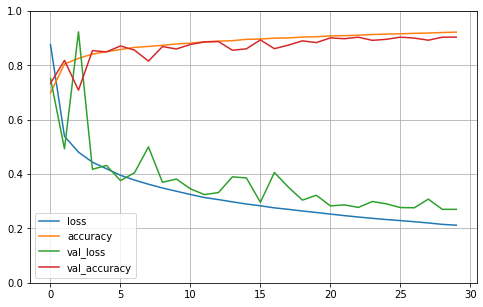

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [17]:
model_eval=model.evaluate(X_test,y_test)
model_eval

313/313 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.8987


[0.28120481967926025, 0.8986999988555908]

In [18]:
X_new=X_test[:3]

In [19]:
y_proba=model.predict(X_new)
classes_x=np.argmax(y_proba,axis=1)
classes_x

array([9, 2, 1], dtype=int64)

In [20]:
np.array(class_names)[classes_x]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


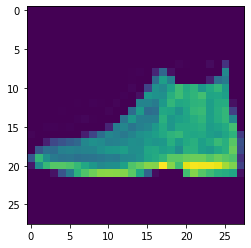

In [22]:
print(plt.imshow(X_test[0].reshape(28,28)))